Chicago_Crimes_2012_to_2017

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [22]:
import os
print(os.listdir('./data'))
data = pd.read_csv('./data/data.ignore.csv')



print(data.head())

data['Arrest'] = data['Arrest'].replace({True: 1, False: 0})
data.drop(
    [
        'Unnamed: 0',
        'Location Description',
        'Beat',
        'District',
        'ID',
        'Case Number',
        'Date',
        'Block',
        'IUCR',
        'Primary Type',
        'Description',
        'Domestic',
        'Community Area',
        'FBI Code',
        'Updated On',
        'Latitude',
        'Longitude',
        'Location',
    ],
    axis = 1,
    inplace = True
)

['data.ignore.csv']
   Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0  

In [19]:
x_indexs = data[data['X Coordinate'] == 0].index
print(x_indexs)
data.drop(x_indexs, inplace=True)

y_indexs = data[data['Y Coordinate'] == 0].index
print(y_indexs)
data.drop(y_indexs, inplace=True)

data[data == np.inf] = np.nan
data.fillna(data.mean(), inplace=True)

coord_names = ['X Coordinate', 'Y Coordinate']

training_data = stats.zscore(data[coord_names])

Int64Index([ 78556,  84975, 102034, 116741, 119233, 119877, 174204, 188517,
            190122, 198275, 207229, 207624, 213768, 214083, 236441, 238790,
            251590, 256636, 314720, 322685, 358463, 367061, 437517, 439077,
            439573, 446834, 447055, 463815, 498093, 510428, 514972, 533810,
            553886, 673535, 678656, 712776, 714081, 721122, 725910, 738057,
            744149, 748205, 754785, 755101, 757075, 764282, 765125, 767159,
            768027, 782596, 783388, 803297, 803917, 814576, 818427, 822620,
            823688, 824340, 826438, 831838, 832605, 834363, 838445, 861735,
            868665, 874458, 885068, 892182, 911523, 912594, 918280, 921549,
            929734, 931947, 941725, 962541, 978239],
           dtype='int64')
Int64Index([], dtype='int64')


now its time to cluster the actual data

In [20]:
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters = 8,
    random_state = 0
)

model.fit(training_data)

# get the labels and assign to oiginal data labels
labels = model.labels_
data['clusters'] = labels

coord_names.extend(['clusters'])

coords = data[coord_names]

print(coords.groupby(['clusters']).mean())

          X Coordinate  Y Coordinate
clusters                            
0         1.174033e+06  1.863835e+06
1         1.135999e+06  1.918173e+06
2         1.151139e+06  1.901206e+06
3         1.174820e+06  1.834506e+06
4         1.191011e+06  1.851594e+06
5         1.162587e+06  1.931422e+06
6         1.170842e+06  1.898475e+06
7         1.154964e+06  1.863709e+06


Text(30.791519097222235, 0.5, 'Y Coordinate')

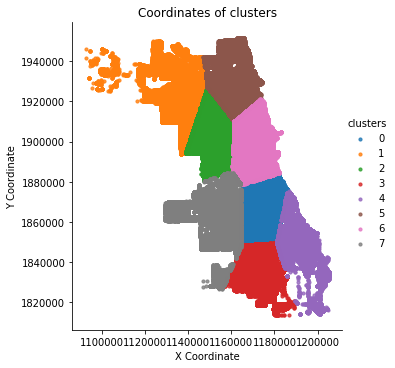

In [21]:
sns.lmplot(
    'X Coordinate', 'Y Coordinate',
    data = data,
    fit_reg = False,
    hue = 'clusters',
    scatter_kws = {
        'marker': 'D',
        's': 10
    }
)

plt.title('Coordinates of clusters')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')